<a href="https://colab.research.google.com/github/ikhramoe/Tugas-Akhir-Kampus-Merdeka-ORBIT/blob/main/PA_FACE_RECOGNITION_TEKTRONIKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
from os import listdir
from PIL import Image as Img
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from keras.models import load_model
import numpy as np
import tensorflow as tf

import pickle
import cv2

In [6]:
HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [7]:
!wget "https://drive.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1"

--2022-06-17 06:38:32--  https://drive.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1
Resolving drive.google.com (drive.google.com)... 172.217.193.101, 172.217.193.113, 172.217.193.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.193.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tqvl8bossmov7teapdu0qisjbf2lvl4m/1655447850000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download [following]
--2022-06-17 06:38:36--  https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tqvl8bossmov7teapdu0qisjbf2lvl4m/1655447850000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download
Resolving doc-04-4s-docs.googleusercontent.com (doc-04-4s-docs.googleusercontent.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connecting to doc-04-4s-docs.googleusercontent.com (doc-04-4s

In [8]:
MyFaceNet = load_model("facenet_keras.h5")

In [9]:
folder='fotoPeserta/'
database = {}

for filename in listdir(folder):

    path = folder + filename
    gbr1 = cv2.imread(folder + filename)
    
    wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)
    
    if len(wajah)>0:
        x1, y1, width, height = wajah[0]         
    else:
        x1, y1, width, height = 1, 1, 10, 10
        
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    gbr = cv2.imread(path, cv2.IMREAD_COLOR)
    gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
    gbr = Img.fromarray(gbr)                  # konversi dari OpenCV ke PIL
    gbr_array = asarray(gbr)
    
    face = gbr_array[y1:y2, x1:x2]                        
    
    face = Img.fromarray(face)                       
    face = face.resize((160,160))
    face = asarray(face)
    
    face = face.astype('float32')
    mean, std = face.mean(), face.std()
    face = (face - mean) / std
    
    face = expand_dims(face, axis=0)
    signature = MyFaceNet.predict(face)
    
    database[os.path.splitext(filename)[0]]=signature

In [10]:
database

{'Abde F': array([[-0.7383933 , -1.4590864 , -0.28604499, -0.4976881 , -0.50345564,
          0.9445992 , -0.35716587,  0.8452565 ,  0.89937186,  0.26240414,
          0.01756233,  0.9096459 ,  2.4364474 , -0.7233547 , -0.46141562,
         -0.5959539 ,  0.9301436 , -1.2721488 ,  1.0332465 ,  1.4422047 ,
          0.2758046 ,  0.43737245, -0.5783676 ,  0.81139857,  0.81932414,
          0.07339874,  1.1503315 ,  0.29264182,  0.3125306 , -0.94409746,
         -0.32630095,  0.8076805 , -0.1766093 ,  0.2511624 , -0.36492264,
          0.4832543 , -0.958473  , -0.7067047 , -1.33673   ,  0.03543645,
          0.49650705,  1.299894  , -0.4015542 ,  0.8119952 , -0.277103  ,
         -1.1357635 ,  0.03303149, -0.6984085 , -0.04752827,  0.14824234,
         -2.4595137 , -0.03938078, -1.4032474 , -0.13321486, -0.7914997 ,
         -0.88257563,  1.2783337 , -0.17509562, -1.7473739 , -1.4923602 ,
         -0.35234174,  0.44751555, -0.16769367,  0.4080757 , -0.7036755 ,
          0.58989525,  0.475

In [11]:
myfile = open("data.pkl", "wb")
pickle.dump(database, myfile)
myfile.close()

In [12]:
myfile = open("data.pkl", "rb")
database = pickle.load(myfile)
myfile.close()

In [13]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

In [14]:
def findFaces(data):
  gbr1 = js_to_image(data)
  gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
  gbr = Img.fromarray(gbr)                  # konversi dari OpenCV ke PIL
  gbr_array = asarray(gbr)
 
  wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)
  
  for (x1,y1,w,h) in wajah:
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + w, y1 + h
    
      face = gbr_array[y1:y2, x1:x2]                        
    
      face = Img.fromarray(face)                       
      face = face.resize((160,160))
      face = asarray(face)
    
      face = face.astype('float32')
      mean, std = face.mean(), face.std()
      face = (face - mean) / std
    
      face = expand_dims(face, axis=0)
      signature = MyFaceNet.predict(face)
    
      min_dist=100
      identity=' '
      for key, value in database.items() :
        dist = np.linalg.norm(value-signature)
        if dist < min_dist:
          min_dist = dist
          identity = key
      print(identity)      
      cv2.putText(gbr1,identity, (x1,y1),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)
      cv2.rectangle(gbr1,(x1,y1),(x2,y2), (0,255,0), 2)
  
  filename='photo.jpg'
  cv2.imwrite(filename, gbr1)
  
  return filename

In [15]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  
  filename=findFaces(data)
  return filename

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
Ikhram = [-0.25139982, -1.0825523 , -1.4453095 ,  1.8817111 ,  0.99884856,
          1.8167807 , -1.0776755 ,  0.14808367,  1.0066276 ,  0.49550918,
         -1.6604726 , -0.74958086, -0.19937539, -1.1112144 , -0.5169859 ,
         -0.20866078,  1.6637738 ,  0.5227611 ,  0.38151717, -0.09148082,
          1.0964371 , -0.32924005, -1.7160122 , -1.1529323 ,  0.17071143,
          1.8850371 ,  0.99703693, -0.04540037,  0.401528  , -0.54069215,
          1.1926686 ,  0.520397  ,  0.20645805, -1.6646369 , -0.31878135,
          0.11027168, -1.1568526 , -0.22708902,  0.6523465 , -0.31259534,
          0.47793365, -0.4509615 ,  0.3190971 , -1.3092206 ,  1.2304441 ,
          0.4963051 , -0.592424  ,  1.4594886 , -0.5173673 , -1.4099017 ,
          0.2700854 ,  1.2713239 , -0.08902476,  1.4630141 ,  2.4293764 ,
         -0.61857325,  0.5135419 , -1.8018202 ,  2.1597762 , -1.239501  ,
         -0.7566889 , -1.3237387 ,  2.115788  ,  0.71303296,  0.22377864,
         -0.57806253,  0.33281887, -0.85892665, -2.2791996 , -0.94520915,
         -0.18524228, -0.7731732 , -1.2429167 ,  0.40340722,  0.7120346 ,
          0.5449976 , -0.5867373 ,  1.7270277 ,  0.5765264 ,  0.5386819 ,
         -0.437922  , -0.01721372, -0.9876375 , -1.0659696 , -0.07022239,
          0.04873687, -2.4053843 , -0.18809287, -0.8622581 , -1.2144548 ,
          0.2804836 ,  0.5025599 ,  0.01256925,  0.39654762, -0.6041475 ,
         -1.1056912 , -0.05401558, -0.01505097, -0.02631424,  0.12045168,
          0.20733626,  0.07782594, -0.08982968,  0.4769331 , -1.3706502 ,
          1.0308744 , -1.7795252 ,  0.17851831, -0.28859085,  1.0769285 ,
         -1.0862874 ,  0.6448991 , -0.35524768, -0.69107807, -0.32965204,
         -0.3197562 , -1.4474245 , -0.40454388, -0.56756073, -0.44589186,
          0.09162942,  0.04297318,  1.4429501 , -0.47416285,  0.06079215,
          0.89963526,  2.2086527 , -0.32888246]
Raihan = [0.5919486 , -0.6441562 ,  0.72382534, -0.16349882, -0.8432521 ,
          2.578981  ,  0.3657545 , -1.2480307 ,  0.9983409 ,  1.3192573 ,
         -1.8091463 , -0.64791715, -1.071725  ,  0.05448988, -1.6192565 ,
          0.2668649 ,  1.3135688 , -0.8145633 ,  0.40751874, -2.1987956 ,
          1.1782017 , -0.31823623, -1.5711873 , -0.7678246 ,  0.05354771,
          0.08108172,  0.85468066,  0.3058319 ,  0.7065625 ,  1.0536808 ,
          0.9151585 ,  0.5452076 ,  0.66597086, -0.73185563,  0.85859853,
         -0.9867584 , -2.4878974 ,  0.72493416,  2.0721014 , -0.18662821,
         -0.32289612, -1.1496509 , -1.0520627 , -1.0554137 ,  1.7822891 ,
         -0.14996408, -1.3102795 ,  1.6253397 ,  0.06579864, -0.6606549 ,
          0.1640107 , -0.172238  ,  0.32781473, -0.22419484,  1.3077003 ,
          0.86535347, -0.27786562, -2.738265  ,  1.7366331 , -0.7112356 ,
         -1.4287447 , -0.01767069,  0.14151555,  0.0929299 ,  0.02917644,
          0.4512092 , -0.35778892,  0.02951371, -1.5808302 , -0.2754705 ,
         -1.076249  , -0.2906652 ,  1.6161247 , -1.7896518 ,  0.60778254,
          0.35485843, -0.19730484,  0.6668111 ,  0.6722345 ,  0.47723758,
         -0.5048667 , -0.660077  , -0.9444887 , -1.0690664 ,  0.9981593 ,
         -0.63358736, -0.5082176 , -0.92532825,  0.14555013,  0.35936445,
          1.0919214 ,  2.5051167 , -0.46887204, -0.28348184,  1.1824551 ,
          0.27129832,  0.09175909,  0.39848158, -0.80754507, -0.21567793,
          0.8675726 ,  0.76404953, -0.24497351, -0.26718885, -0.7353426 ,
          1.0842086 , -0.8367095 ,  0.3935025 , -0.20481826, -0.4978357 ,
          0.23927327, -0.21174996, -2.114105  , -0.329146  , -0.68529445,
          0.78626764,  0.4036297 ,  1.7504317 , -1.1984545 , -0.68578625,
          0.8174563 ,  0.5497308 ,  2.0759974 ,  0.31869292,  0.64697975,
         -0.11441734,  0.79789287, -0.9303354]

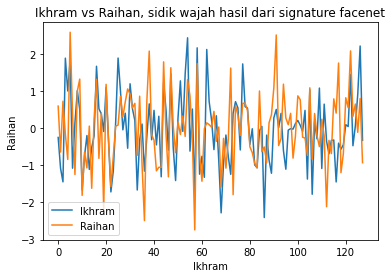

In [18]:
plt.plot(Ikhram)
plt.plot(Raihan)
plt.title('Ikhram vs Raihan, sidik wajah hasil dari signature facenet')
plt.xlabel("Ikhram")
plt.ylabel("Raihan")
plt.legend(labels=['Ikhram',"Raihan"])

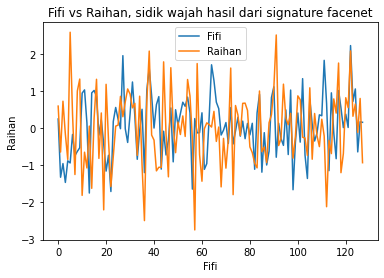

In [19]:
Fifi = [0.24596821, -1.321576  , -0.953898  , -1.4608363 , -0.8801082 ,
         -0.93659675, -0.1696266 , -0.74161106, -0.6253433 , -0.5281949 ,
          0.9408223 ,  1.0282043 ,  0.13898359, -1.746336  ,  0.9473715 ,
          1.0141108 ,  0.85476494, -0.18846658,  0.22159415, -0.42779222,
         -1.1560974 , -0.7310204 , -1.7050766 ,  0.18046263,  0.55540293,
          0.24357691, -0.01541299,  1.9490851 , -0.0173726 , -0.38539723,
          0.3712746 ,  1.2407948 ,  0.3174888 , -0.8385095 , -0.07092819,
          0.506594  , -1.1974342 ,  1.0299737 ,  1.6052933 ,  0.8678552 ,
          0.00230318,  0.6317762 ,  0.8471041 , -1.1024324 , -0.08364628,
         -0.7221643 , -0.32002935,  0.5429256 , -0.907574  ,  0.49512923,
          0.08141657,  0.38763407,  0.69686097,  0.5873695 ,  0.8348424 ,
          0.41205403, -1.6405617 ,  0.2566194 , -0.12785581, -0.12226845,
          0.41198838, -1.1086885 , -0.9554029 ,  0.2888205 ,  1.7035472 ,
          1.281398  ,  0.6971481 ,  0.5249535 , -0.18580893, -0.05363761,
          0.14911091, -0.4118441 ,  0.5525166 , -0.42654318, -0.07788523,
          0.2912178 , -0.21655306,  0.18886279, -0.2846494 ,  0.12657802,
         -0.18231934,  0.12990107, -1.1068473 ,  0.41181234,  0.90763766,
         -1.1853648 , -0.12229525, -0.99179673, -0.6209278 ,  0.82260764,
          1.111999  , -0.7833842 ,  0.13129497, -0.28117934, -0.4643584 ,
          0.48972788, -0.7109677 ,  1.0236737 , -1.6575863 , -0.3708277 ,
          0.4072141 , -0.3769674 ,  1.3307761 , -0.7268482 , -1.354358  ,
          0.7814524 ,  0.10497129, -0.34595835, -0.1357621 ,  0.35718024,
          0.33240288,  1.823105  ,  0.6658503 , -1.1438415 ,  0.9489625 ,
         -0.12814069, -0.8228005 ,  1.0126462 ,  0.5417606 ,  0.01336923,
          0.3745017 ,  0.01757336,  2.220271  ,  0.7182436 ,  1.0534562 ,
         -0.63967574,  0.17001575,  0.15638554]

plt.plot(Fifi)
plt.plot(Raihan)
plt.title('Fifi vs Raihan, sidik wajah hasil dari signature facenet')
plt.xlabel("Fifi")
plt.ylabel("Raihan")
plt.legend(labels=['Fifi',"Raihan"])

<IPython.core.display.Javascript object>

Fauzan Akbar Nugraha
Saved to photo.jpg


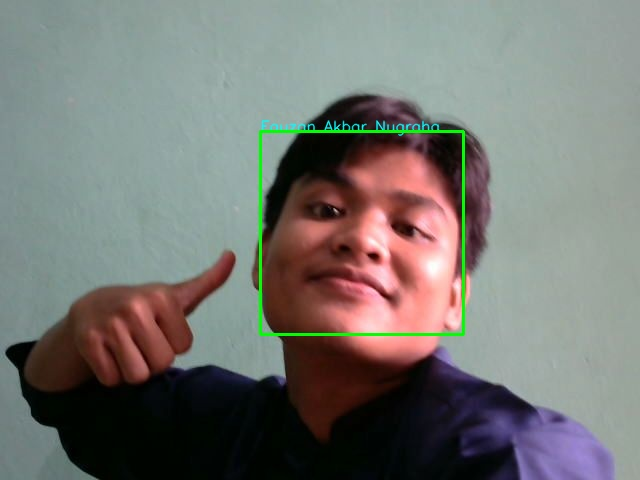

In [41]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))